In [32]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [67]:
!pip3 install git+https://github.com/jcreinhold/intensity-normalization.git

  Cloning https://github.com/jcreinhold/intensity-normalization.git to /private/var/folders/8x/d4z0ynkd0z37z1jy6x8b0sdw0000gn/T/pip-req-build-swl_2ljd
  Running command git clone -q https://github.com/jcreinhold/intensity-normalization.git /private/var/folders/8x/d4z0ynkd0z37z1jy6x8b0sdw0000gn/T/pip-req-build-swl_2ljd
ERROR: Files/directories not found in /private/var/folders/8x/d4z0ynkd0z37z1jy6x8b0sdw0000gn/T/pip-req-build-swl_2ljd/pip-egg-info


In [93]:
ds = pydicom.dcmread('mri_L/MR_0004_L/00008_1.3.12.2.1107.5.2.31.30664.2013101612353327089557754.dcm')


In [94]:
flat = np.array(ds.pixel_array).flatten()

In [95]:
m = np.mean(flat)

In [96]:
s = np.std(flat)

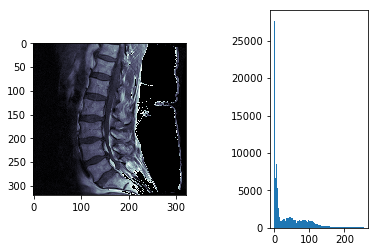

In [155]:
cutoff = m + 0.5*s
r = np.clip(ds.pixel_array, 0, cutoff)
r = np.where(r ==  cutoff, 0, r)
f = np.interp(r, (r.min(), r.max()), (0, 255))
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(f, cmap="bone", vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.hist(f.flatten(), 100)

plt.show()



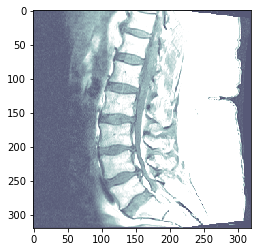

In [107]:
plt.imshow(np.clip(ds.pixel_array + 100, 0, 255), cmap="bone", vmin=0, vmax=255)